
----
# **Compte rendu des TP : ANDRE Noa / MALLEZ Alexandre**
----

# TSIA202a - First Practice Session
The goal of this first practical work is to experiment the estimation of second order moments for
random processes, and to simply compare them with their theoretical version. 

Let consider the following real processes:
-  White Noise (denoted $\text{WN}$) $Z_t$ with variance $\sigma^2$ (use `np.random.normal`)
-  $X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$
- $X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$ (with $K$ "big enough")
- Harmonic Process: $X_t=A_0\cos(\lambda_0t+\Phi_0)+Z_t$ where $\lambda \in [0,\pi[,$ $\Phi_0 \sim \mathcal{U}([0,2\pi])$ (*e.g.* `np.random.uniform`)

For each of them:
1. Compute the theoretical mean and autocovariance of the previous mentioned real processes using the formulas $\mathbb{E}(X_n)$ and $\mathrm{Cov}(X_{n},X_{n+h})$.
2. Compute their empirical mean and empirical autocovariance function using course's formulas in python.
3. Plot the theoretical operator and empirical estimators for various sampling many times and comment.
4. For a given number $ T \in \{10, 100, 500, 1000\}$ of samples $X_1, \dots, X_T$:
  - for a given draw, compute the mean squared error (MSE) $\frac{1}{T}\sum_t (\gamma_{t} - \hat{\gamma_{t}})^2$ between the theoretical and the empirical autocovariance function denoted $\gamma$ and $\hat{\gamma}$ respectively.
  - Repeat the previous step $100$ times and saves all the results.
  - compute the boxplot of the MSE for each $T$ and comment.





---


# Question 1

## 1-

La moyenne et la fonction autocovariance d'un bruit blanc sont connues de par sa définition : 

$$E(Z_t) = 0$$

et :  

$$
\gamma_{Z}(h) =
\begin{cases}
  \sigma^2 & \text{if } h = 0, \\
  0 & \text{otherwise}.
\end{cases}
$$

## 2-

$$E(X_t) = E(a) + bE(Z_t) + E(Z_{t-1}) = a $$


car Z est un bruit blanc
  

$$
\begin{align}
\gamma_{X}(h) &= Cov(X_t,X_{t+h}) \\
&= Cov(a+bZ_t+Z_{t-1},a+bZ_{t+h}+Z_{t-1+h}) \\
&= b^2Cov(Z_t,Z_{t+h}) + bCov(Z_t,Z_{t-1+h}) + bCov(Z_{t-1},Z_{t+h}) + Cov(Z_{t-1},Z_{t-1+h}) \\
&= (b^2 + 1)\sigma^2\delta _h + b\sigma^2\delta _{h-1} + b\sigma^2\delta _{h+1}
\end{align}
$$
d'après la covariance d'un bruit blanc





## 3-

$$
\begin{align}
E(X_t) &= E(a) + \sum_{k=0}^{K}2^{-k}E(Z_{t-k}) \\
&= a\\
\\
\gamma_{X}(h) &= Cov(\sum_{k=0}^{K}2^{-k}Z_{t-k} + a,\sum_{l=0}^{K}2^{-l}Z_{t-l+h} + a) \\
&= \sum_{k=0}^{K}\sum_{l=0}^{K}2^{-k-l}Cov(Z_{t-k},Z_{t-l+h})\\
&= \sum_{k=0}^{K}\sum_{l=0}^{K}2^{-k-l}\sigma^2\delta _{k-l-h} \\
&= \sum_{k=0}^{K}\sum_{l=h}^{K+h}2^{-k-l+h}\sigma^2\delta _{k-l}\ \\

&= \begin{cases}
  \sum_{k=h}^{K}2^{-2k+h}\sigma^2 &\text{si } 0\leq h\leq K, \\
  \sum_{k=0}^{K+h}2^{-2k+h}\sigma^2 &\text{si} -K\leq h\leq 0, \\
  0 & \text{sinon}.
\end{cases} \\

&= \begin{cases}
  \sum_{k=0}^{K-h}2^{-2(k+h)+h}\sigma^2 &\text{si } 0\leq h\leq K, \\
  \sum_{k=0}^{K+h}2^{-2k+h}\sigma^2 &\text{si} -K\leq h\leq 0, \\
  0 & \text{sinon}.
\end{cases} \\

&= \begin{cases}
  \sigma^2 2^{-h} \frac {1-2^{-2(K-h+1)}}{1-\frac{1}{4}} &\text{si } 0\leq h\leq K, \\
  \sigma^2 2^{h} \frac {1-2^{-2(K+h+1)}}{1-\frac{1}{4}} &\text{si} -K\leq h\leq 0, \\
  0 & \text{sinon}.
\end{cases} \\

&= \begin{cases}
  \sigma^2 2^{-|h|}  \frac {4-4^{-K+|h|}}{3} & \text{si } 0\leq |h|\leq K, \\
  0 & \text{sinon}.
\end{cases}
\end{align}
$$

## 4-

$$
\begin{align}
E(X_t) &= A_0E(\cos(\lambda_0t + \Phi_0))+E(Z_t)\\
       &=A_0\frac{1}{2\pi}\int_{0}^{2\pi}\cos(\lambda_0t + \phi)d\phi\\
       &=0 \\
\end{align}
$$

Comme $\Phi_0 \sim \mathcal{U}([0,2\pi])$ alors $cos(\lambda_0t + \Phi_0) \sim \mathcal{U}([-1,1])$ 

$$
\begin{align}
\gamma_{X}(h) &= Cov(A_0\cos(\lambda_0t + \Phi_0)+Z_t , A_0\cos(\lambda_0(t+h) + \Phi_0)+Z_{t+h})\\
              &= A_0^2Cov(cos(\lambda_0t + \Phi_0),cos(\lambda_0(t+h) + \Phi_0))+ A_0Cov(cos(\lambda_0t + \Phi_0),Z_{t+h}) + A_0Cov(cos(\lambda_0(t+h) + \Phi_0),Z_{t}) + Cov(Z_t,Z_{t+h}) \\
              &= A_0^2E[cos(\lambda_0t + \Phi_0)cos(\lambda_0(t+h) + \Phi_0)] + 0 + 0 + \sigma^2\delta_h \\
              &= \frac{A_0^2}{2}E[cos(\lambda_0h) + cos(2\lambda_0t + \lambda_0h + 2\Phi_0)] + \sigma^2\delta_h \\ 
              &\text{avec un calcul similaire à celui de l'esperance on obtient :}\\
              &= \frac{A_0^2}{2}cos(\lambda_0h) + \sigma^2\delta_h
\end{align}
$$
---

# Question 2 et 3

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz


In [15]:
# Constantes
a = 10
b = 1
K=50
A0 = 1
lambda0 = 1 # entre 0 et pi

mu = 0
sigma = 2

# White Noise
def WN(N):
    return np.random.normal(mu, sigma, N)

# First process
def X1(N):
    X1 = np.zeros(N)
    Z = WN(N)
    X1[0] = a + b*Z[0]
    X1[1:] = a + b*Z[1:]  + Z[:-1]
    return X1

# Second process
def X2(N):
    X2 = np.ones(N) * a
    Z = WN(N)
    for t in range(N):
        for k in range(min(t+1, K)):
            X2[t] +=  Z[t-k] / 2**k
    return X2

# Third process
def X3(N):
    X3 = np.zeros(N)
    Z = WN(N)
    phi0 = np.random.uniform(0, 2*np.pi)
    for t in range(N):
        X3[t] = A0 * np.cos(lambda0*t + phi0) + Z[t]
    return X3


In [16]:

def empirical_mean(X):
    mean = np.sum(X)/len(X)
    return mean

def empirical_autocov(X, h):
    mu = empirical_mean(X)
    N = len(X)
    gamma = 0
    h = np.abs(h)
    if 0<=h and h<=N-1:
        gamma = np.sum( (X[h:] - mu) * (X[:N-h] - mu) ) / N
    return gamma


In [17]:
def plot_mean(X, theo_value, N,  M):  # N : time samples, M : number of times series
    Y=[]
    for i in range(M):
        Y.append(empirical_mean(X(N)))

    plt.figure(figsize=(6, 3))
    plt.hist(Y, bins = 50, color = 'red', edgecolor = 'black')
    plt.axvline(theo_value, color = 'green', label='theorical value', linewidth = 5)
    plt.title(f'Means of {X.__name__}, N={N}, M={M}')
    plt.legend()




## Esperance

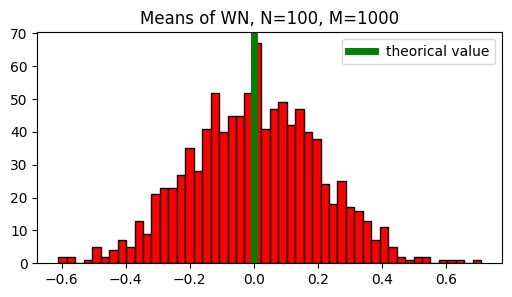

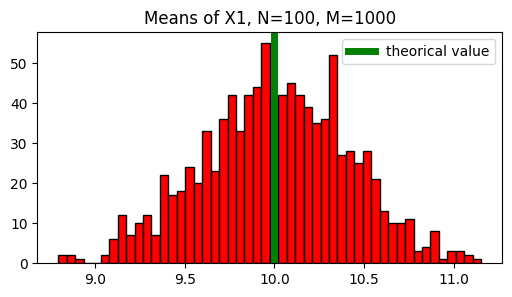

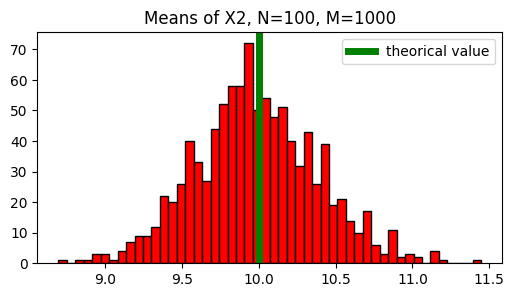

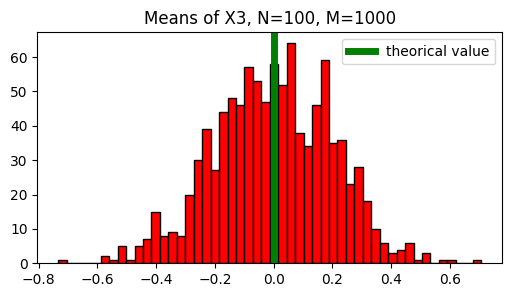

In [18]:
N = 100
M = 1000
plot_mean(WN, mu, N, M)
plot_mean(X1, a, N, M)
plot_mean(X2, a, N, M)
plot_mean(X3, 0, N, M)

In [19]:
#theorical autocov
def autocov_WN(h_max):
    gamma = []
    for h in range(-h_max, h_max):
        if(h==0):
            gamma.append(sigma*sigma)
        else:
            gamma.append(0)
    return gamma
    
def autocov_X1(h_max):
    gamma = []
    for h in range(-h_max, h_max):
        if(h==0):
            gamma.append((b*b +1)*sigma*sigma)
        elif(abs(h) == 1):
            gamma.append(b*sigma*sigma)
        else:
            gamma.append(0)
    return gamma
    
def autocov_X2(h_max):
    gamma=[]
    for h in range(-h_max, h_max):
        if (abs(h) <= K):
            gamma.append(sigma*sigma* 2**(-abs(h)) * (4-4**(-K+abs(h)))/3)
        else:
            gamma.append(0)
    return gamma
    
def autocov_X3(h_max):
    gamma=[]
    for h in  range(-h_max, h_max):
        if(h==0):
            gamma.append(A0**2/2*np.cos(lambda0*h) + sigma*sigma)
        else:
            gamma.append(A0**2/2*np.cos(lambda0*h))            
    return gamma

In [20]:
def plot_autocov(X, N, max_h, theo_value, M):  # T : time, M : number of times series
    H=range(-max_h, max_h)
    plt.figure(figsize=(6, 3))
    plt.title(f'Autocovariance of {X.__name__}, N={N}, M={M}')
    plt.plot(H, theo_value, color='green',  label='theorical value')
    plt.legend()
    for i in range(M):
        Y=[]
        for h in range(-max_h, max_h):
            Y.append(empirical_autocov(X(N), h))
        plt.plot(H, Y)
    plt.show()



## Autocovariance

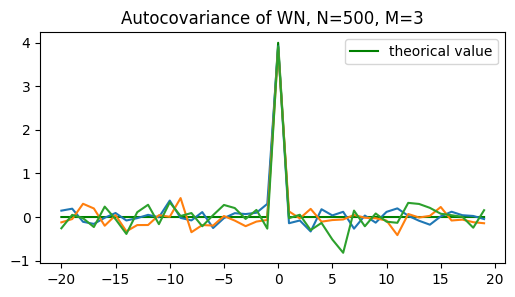

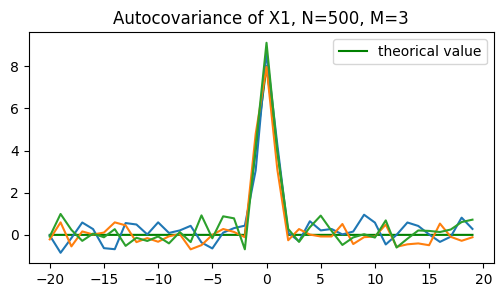

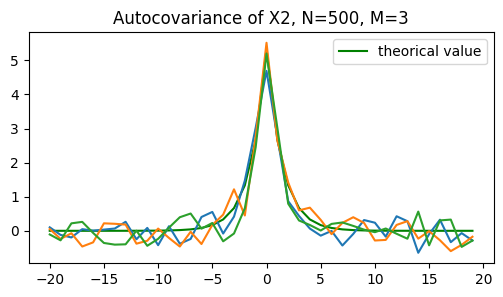

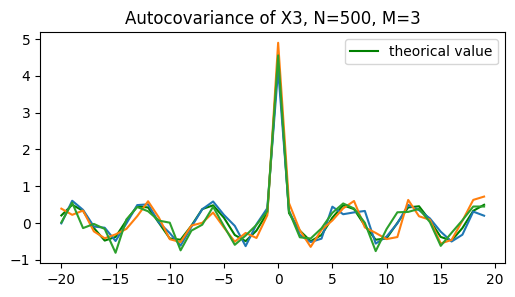

In [21]:
N = 500
M=3
h_max = 20
plot_autocov(WN, N, h_max, autocov_WN(h_max), M)
plot_autocov(X1, N, h_max, autocov_X1(h_max), M)
plot_autocov(X2, N, h_max, autocov_X2(h_max), M)
plot_autocov(X3, N, h_max, autocov_X3(h_max), M)


Les valeurs réelles coincident avec les valeurs théoriques.

In [22]:
def mse(empir, theo):
    N = len(empir)
    empir = np.array(empir)
    theo = np.array(theo)
    return np.sum((empir-theo)**2)/N

T=[10, 100, 500, 1000]



In [23]:
#WN

def plot_mse_boxplots(T_values, autocov_X, empirical_autocov, X):
    for t in T_values:
        MSE = []  # Stocker les MSE pour cette valeur de T
        theo = autocov_X(t)[t:]  # Autocovariance théorique pour T donné

        # Calculer les MSE pour 100 simulations
        for _ in range(100):
            empir = []
            for h in range(t):
                empir.append(empirical_autocov(X(t), h))
            MSE.append(mse(empir, theo))
        
        # Tracer un boxplot pour cette valeur de T
        plt.figure(figsize=(6, 4))
        plt.boxplot(MSE, patch_artist=True, boxprops=dict(facecolor='lightblue'))
        plt.title(f'Boxplot de la MSE pour T = {t}')
        plt.ylabel('MSE')
        plt.grid(axis='y', linestyle='--')
        plt.show()


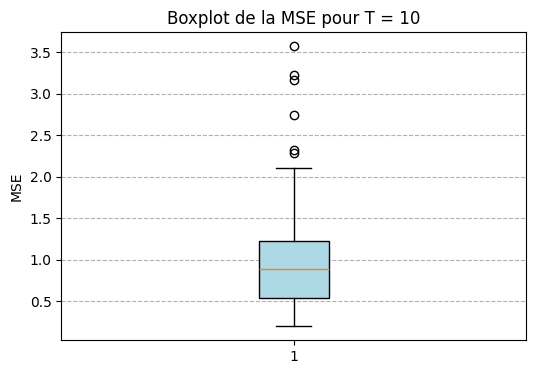

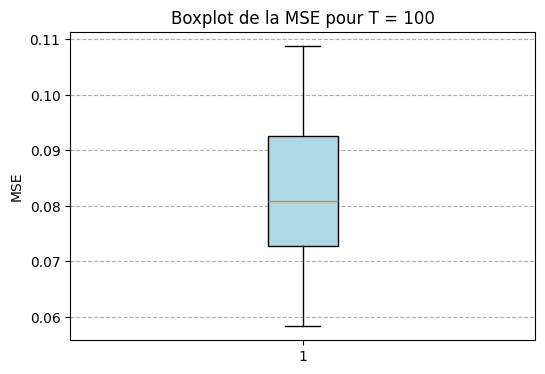

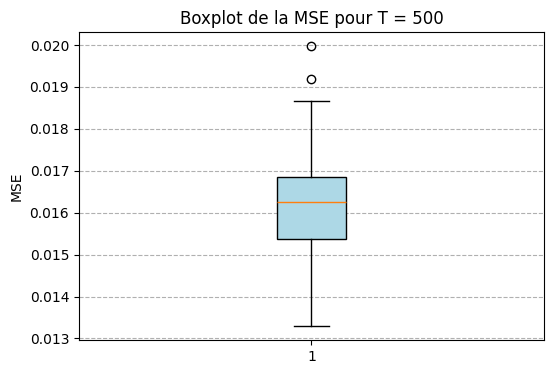

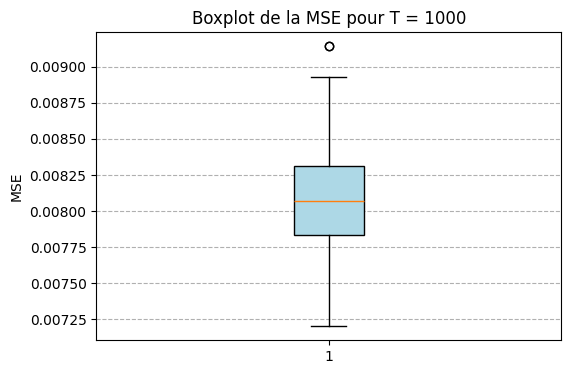

In [24]:
plot_mse_boxplots(T, autocov_WN, empirical_autocov, WN)

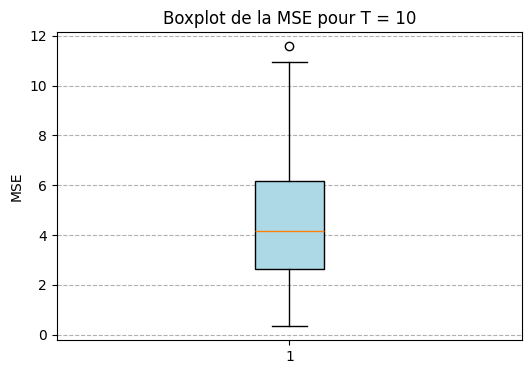

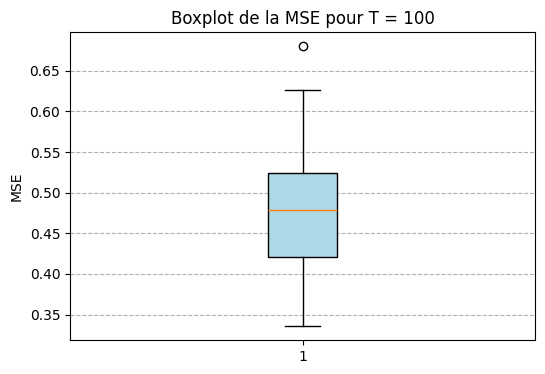

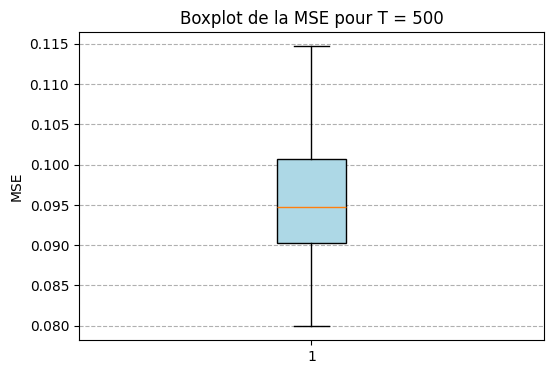

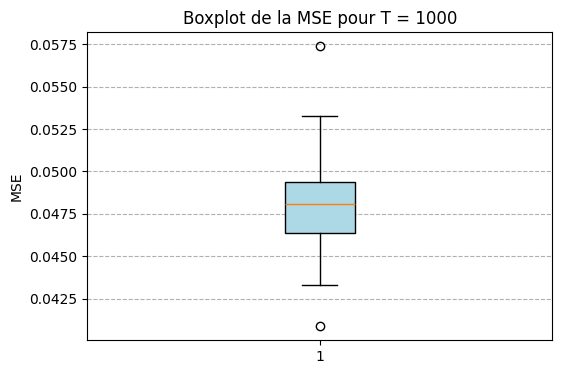

In [25]:
#X1

plot_mse_boxplots(T, autocov_X1, empirical_autocov, X1)

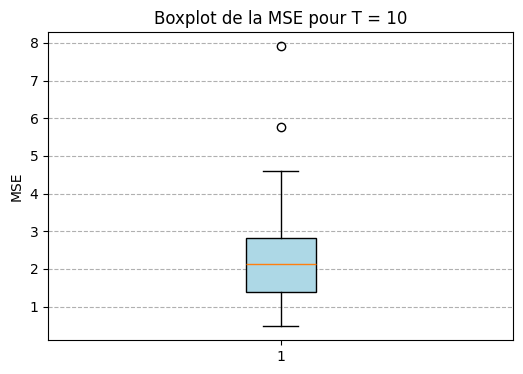

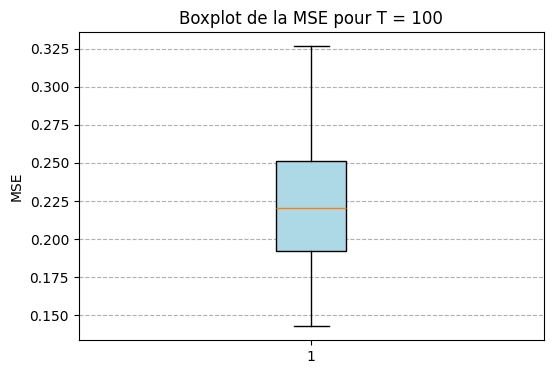

In [26]:
T1=[10, 100]
plot_mse_boxplots(T1, autocov_X2, empirical_autocov, X2)
#l'execution prend beaucoup de temps pour T=500 et 1000

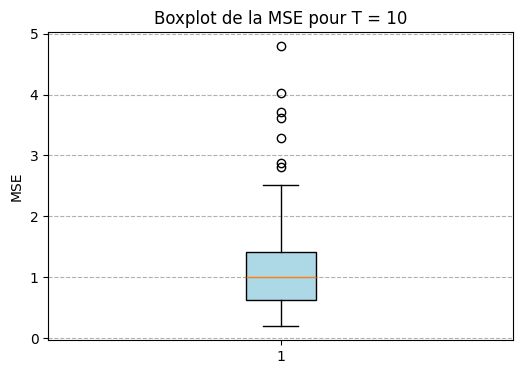

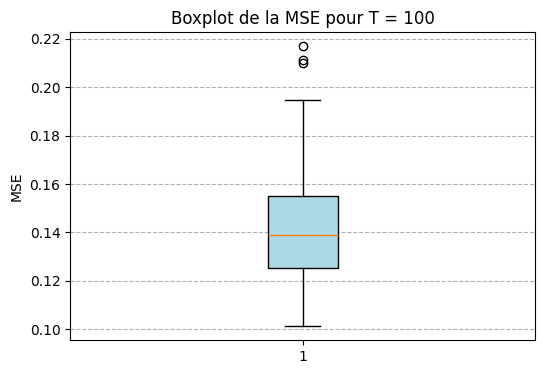

In [27]:
plot_mse_boxplots(T1, autocov_X3, empirical_autocov, X3)
#l'execution prend beaucoup de temps pour T=500 et 1000

On voit que plus on prend d'échantillons dans la série, plus l'estimation de la covariance est précise.

---

# TSIA202a - Second Practice Session : Spectral density estimation and periodogram
The goal of this second session is to provide a power spectral density estimator of a real, zero-mean, weakly stationary process $X_t$. We suppose that we have access to $n$ observations and we will use the FFT algorithm (that implements the DFT) using `numpy.fft.module`.
Recall (from the course) that the periodogram of the observations $X_0, \dots, X_{n-1}$ can be given as:
$$
I_n(\lambda) = \frac{1}{2\pi n}|\sum_{k=0}^{n-1} X_k e^{i\lambda k}|^2
$$

Moreover, the Hertglotz theorem provides a relation between the empirical autocovariance $\hat{\gamma}_n$ and the periodogram $I_n$:
$$
\hat{\gamma}_n(k) = \int_{0}^{2\pi}e^{i\lambda k}I_n({\lambda})d\lambda
$$

1. For a given $m \geq n$  we denote also the DFT as:
$$
DFT(X,m)(k) = \sum_{h=0}^{n-1}X_he^{-2i\pi\frac{kh}{m}}
$$
Show the following relation: 
$$I_n(\frac{2\pi k}{m}) = \frac{1}{2\pi n} |DFT(X,m)(k)|^2$$
2. provide a script that compute those $I_n(\frac{2\pi k}{m})$ for the time series mentioned in the first practice session
3. Show that $I_n(\lambda) = \frac{1}{2\pi} \sum_{k=0}^{n-1} \hat{
    \gamma}_n(k)e^{-i\lambda k}$
4. How to choose $m$ in order to get a simple relation between $\hat{\gamma}_n(k)$ and $I_n(\frac{2\pi k}{m})$ ? At the end, given a specific $\tilde{m}$ show that:
$$
\hat{\gamma}_n(k) = \frac{1}{n} IDFT\left(\left|DFT(X, \tilde{m})\right|^2, \tilde{m}\right)(k)
$$ Try this estimator on the autocovariance of previous time series of the first session.

5. In the case of white noise, estimate the variance of the periodogram for several values of $n$ and discuss about it.




---
# Question 1
\
\
avec $m \geq n $ et $X$ un processus réel  

$$
\begin{align}
I_n\left(\frac{2\pi k}{m}\right) &= \frac{1}{2\pi n} \left| \sum_{h=0}^{n-1} X_h \exp\left(\frac{2i\pi kh}{m}\right) \right|^2\\
&=\frac{1}{2\pi n} \left| \overline{\sum_{h=0}^{n-1} X_h \exp\left(\frac{2i\pi kh}{m}\right)} \right|^2 \\
&= \frac{1}{2\pi n} \left| \sum_{h=0}^{n-1} \underbrace{\overline{X_h}}_{=X_h} \exp\left(\frac{-2i\pi kh}{m}\right) \right|^2\\
&= \frac{1}{2\pi n} |DFT(X,m)(k)|^2\\
\end{align}
$$
---

# Question 2

In [28]:
def periodogram(X):
    DFT = np.fft.fft(X)
    DFT = np.fft.fftshift(DFT)
    n = len(X)
    I = abs(DFT)**2 / (2*np.pi*n)
    return I

def plot_periodogram(X, n):
    plt.figure(figsize=(6, 3))
    plt.title(f'Periodogram of {X.__name__}, n={n}')
    I = periodogram(X(n))
    x_axis = 2*np.pi* np.arange(-n//2, n//2).astype(float) /n
    plt.plot(x_axis, I)
    plt.xlabel('2pi*k/n')
    plt.ylabel('I_n')
    plt.xticks(np.pi * np.array([-1, -1/2, 0, 1/2, 1]),
           labels=[r'$-\pi$', r'$-\frac{\pi}{2}$', 
                    r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])


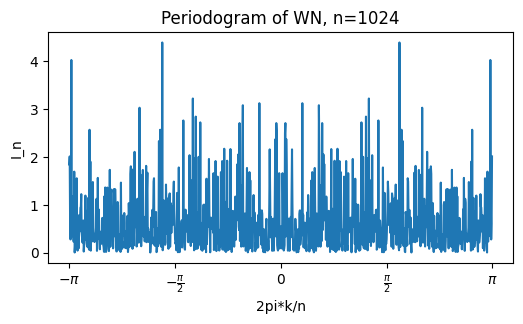

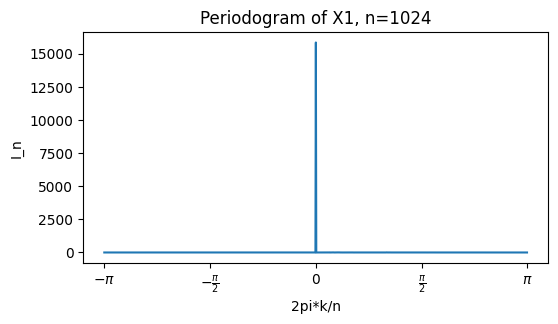

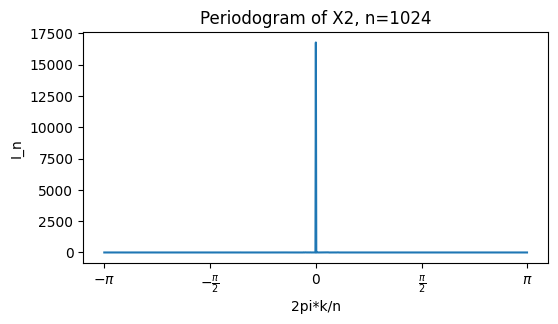

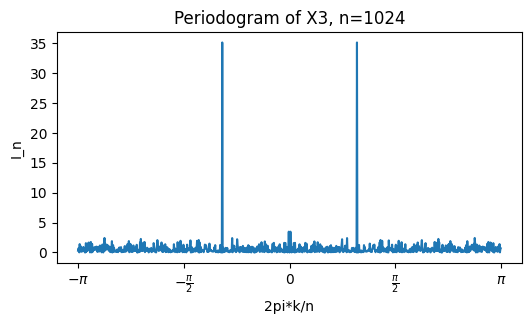

In [29]:
n=1024
plot_periodogram(WN, n)
plot_periodogram(X1, n)
plot_periodogram(X2, n)
plot_periodogram(X3, n)

---

# Question 3

I est la DFTD de $\gamma$, ainsi on applique la DFTD inverse à $\gamma$ pour retrouver l'expression de $I_n$

$$ \begin{align} 
\frac{1}{2\pi}\sum_{k=0}^{n-1} \hat{\gamma _n}(k)e^{-i\lambda k} &= \frac{1}{2\pi}\sum_{k=0}^{n-1}(\int_{0}^{2\pi} e^{i\mu k}I_n(\mu)\, d\mu )e^{-i\lambda k}\\ 

&= \frac{1}{2\pi}\sum_{k=0}^{n-1}(\int_{0}^{2\pi} e^{i\mu k}\frac{1}{2\pi n} \left| \sum_{j=0}^{n-1} X_j e^{i\mu j} \right|^2 \, d\mu )e^{-i\lambda k}\\ 

&= \frac{1}{2\pi}\sum_{k=0}^{n-1}(\int_{0}^{2\pi} e^{i\mu k}\frac{1}{2\pi n}\sum_{j=0}^{n-1}\sum_{p=0}^{n-1}X_j\overline{X_p}e^{i \mu j} e^{-i \mu p}   \, d\mu )e^{-i\lambda k}\\ 

&= \frac{1}{4\pi^2 n }\sum_{k=0}^{n-1}\sum_{j=0}^{n-1}\sum_{p=0}^{n-1}X_j\overline{X_p}e^{-ik\lambda}\underbrace{\int_{0}^{2\pi}e^{i\mu (k+j-p)}\, d\mu}_{=2\pi\delta_{k+j-p}} \\

&= \frac{1}{2\pi n} \sum_{j=0}^{n-1}\sum_{k=-j}^{n-1-j} X_j \overline{X_{k+j}} e^{-ik\lambda}\\

&= \frac{1}{2\pi n} \sum_{j=0}^{n-1}\sum_{k=0}^{n-1}  X_j \overline{X_k} e^{-i(k-j)\lambda}\\

&= \frac{1}{2\pi n} \sum_{j=0}^{n-1}X_j e^{ij\lambda}\sum_{k=0}^{n-1} \overline{X_k} e^{-ik\lambda}\\

&= \frac{1}{2\pi n} \left| \sum_{j=0}^{n-1} X_j e^{i\lambda j} \right|^2 \\

&= I_n(\lambda)
\end{align}$$

---

# Question 4

On prend $m\geq n$ pour vérifier les hypothèses de Q1), on a  : 
$$
\begin{align} 
\quad I_n(\frac {2\pi k} m) &= \frac{1}{2\pi}\sum_{j=0}^{n-1} \hat{\gamma _n}(j)e^{-i\frac {2\pi k} m j} \\
\text{ donc :} \\
\hat{\gamma _n}(k)&=2\pi IDFT(I_n,m)(\frac{2\pi k}{m}) \\
&=2\pi IDFT(\frac{1}{2\pi n} |DFT(X,m)|^2 ,m)(k) \text{ d'après Q1}\\
&=\frac{1}{n}IDFT(|DFT(X,m)|^2,m )(k)\\

\end{align}
$$

---

# Question 5

On calcule la formule avec la formule :
$Var(X) = \hat{\gamma}_n(0) = \frac{1}{n} IDFT\left(\left|DFT(X, m)\right|^2, m\right)(0)\quad$

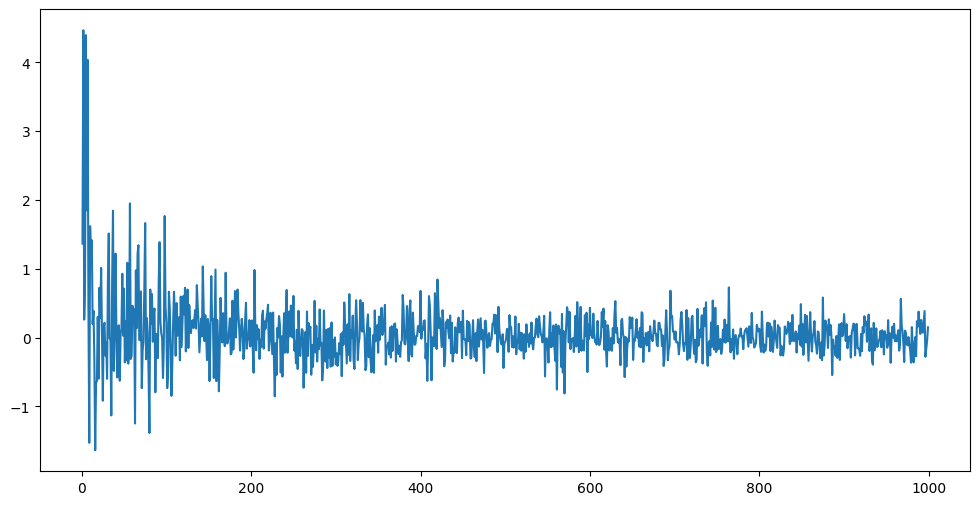

In [30]:
N = range(1, 1000)
var_I = []
for n in N:
    DFT = np.fft.fft(WN(n))
    var_I.append(np.real(np.fft.ifft(DFT**2)[0])/n)

plt.figure(figsize = (12, 6))
plt.plot(N, var_I)

On peut voir que la variance converge vers 0 ce qui est normal

---

# TSIA202a - Third Practice Session

The goal of this third partical work is to use an AR(p) process to model a speech signal, and show that this approch is surprisingly powerful despite its simplicity.

The proposed synthesis algorithm divides into several steps.
1. Filter the audio signal to emphasize the highest frequencies (in order to flatten the spectrum and reduce precision issues with FFT computations).
2. Split the signal into several overlapping frames and iterate over them.
    1. Detect if the frame corresponds to noise or to a voiced signal, and estimate the fundamental frequency in the later case.
    2. Estimate the AR(p) coefficients using Yule-Walker equations.
    3. Re-synthetise the frame using the AR(p) coefficients, starting from a white noise in the case of a noisy frame, or a Dirac comb in the case of a voiced frame.
3. Overlap-add the synthesized frames with a Hanning window.
4. Filter the synthesised signal to de-emphasize the highest frequencies.

We propose to implement this algorithm in two parts. First, we will derive the Yule-Walker equations, and test them on synthetic data. Then, we will code the synthesis algorithm and apply it on a real world speech signal.


# 1. Yule-Walker equations

Let us consider a causal, zero-mean, AR(p) process defined by the following recurrent equation: 
$$
X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \ldots + \phi_p X_{t-p} + Z_{t}
$$
where $\{Z_t , t \in \mathbb{Z}\}$ is a weak white noise with variance $\sigma^2$.

1. Show that, $\forall h \geq 1, \mathbb{E}[X_{t-h}Z_t]=0$.
2. Deduce a recurrent relation between $\gamma(h)$ and $\gamma(h-1),\gamma(h-2),\ldots,\gamma(h-p)$, for $h \geq 1$.
3. We consider separately the case $h=0$: find a new relationship between $\gamma(0)$ and $\gamma(-1),\gamma(-2),\ldots,\gamma(-p)$.
4. Put these relationships in matrix form:
\begin{equation}
\Gamma_{p+1}[1 \; -\phi_1 \; \ldots \; -\phi_p]^T = [\sigma^2 \; 0 \; \ldots \; 0]^T 
\end{equation}
where $\Gamma_{p+1}$ is a suitable Toeplitz matrix that you have to determine.



# 1. Yule-Walker equations

---
## Question 1

$\forall h \geq 1, X_{t-h} \perp Z_t $\
En effet, $X_{t-h}$ ne dépend que des temps passés soit des instants inférieur à t-h < t \
Ainsi $\forall h \geq 1$ : 
$\mathbb{E}[X_{t-h}Z_t]=\mathbb{E}[X_{t-h}]\mathbb{E}[Z_t]= 0 $


---
## Question 2


$\forall h \geq 1 : $
$$
\begin{align}
\gamma(h)&=\mathbb{E}[X_{t}X_{t-h}]  \\                                                      
&=\mathbb{E}[(\phi_1 X_{t-1} + \phi_2 X_{t-2} + \ldots + \phi_p X_{t-p} + Z_{t})X_{t-h}] \\                        
&=\phi_1 \mathbb{E}[X_{t-1}X_{t-h}] + \phi_2 \mathbb{E}[X_{t-2}X_{t-h}] + \ldots + \phi_p \mathbb{E}[X_{t-p}X_{t-h}] + \mathbb{E}[Z_{t}X_{t-h}] \\                    
&=\phi_1\gamma(h-1) + \phi_2\gamma(h-2)+ \ldots + \phi_p\gamma(h-p) + 0 \text{ d'après Q1}  
\end{align}
$$                       
d'où : $\forall h \geq 1,   \gamma(h)=\phi_1\gamma(h-1) + \phi_2\gamma(h-2)+ \ldots + \phi_p\gamma(h-p)$ 

---
## Question 3



$$
\begin{align}
\gamma(0)&=\mathbb{E}[X_{t}X_{t}]  \\                                                      
&=\mathbb{E}[(\phi_1 X_{t-1} + \phi_2 X_{t-2} + \ldots + \phi_p X_{t-p} + Z_{t})X_{t}] \\                        
&=\phi_1 \mathbb{E}[X_{t-1}X_{t}] + \phi_2 \mathbb{E}[X_{t-2}X_{t}] + \ldots + \phi_p \mathbb{E}[X_{t-p}X_{t}] + \mathbb{E}[Z_{t}X_{t}] \\                    
&=\phi_1\gamma(-1) + \phi_2\gamma(-2)+ \ldots + \phi_p\gamma(-p) + \sigma^2 
\end{align}
$$                       



---
## Question 4

Si on met les equations de Q3 et Q4 sous forme d'équation matricielle on a :

$\begin{equation}
\begin{bmatrix}
  \gamma(0) & \gamma(-1) & \ldots & \gamma(-p) \\
  \gamma(1) & \gamma(0) & \ldots & \gamma(1-p)\\
  \vdots & \vdots & \ddots & \vdots\\
  \gamma(p) & \gamma(p-1) & \ldots& \gamma(0)
\end{bmatrix}                  [1 \; -\phi_1 \; \ldots \; -\phi_p]^T = [\sigma^2 \; 0 \; \ldots \; 0]^T 
\end{equation}$

D'où
$\Gamma_{p+1} =\begin{bmatrix}
  \gamma(0) & \gamma(-1) & \ldots & \gamma(-p) \\
  \gamma(1) & \gamma(0) & \ldots & \gamma(1-p)\\
  \vdots & \vdots & \ddots & \vdots\\
  \gamma(p) & \gamma(p-1) & \ldots& \gamma(0) 
\end{bmatrix} 
= \begin{bmatrix}
  \gamma(0) & \gamma(1) & \ldots & \gamma(p) \\
  \gamma(1) & \gamma(0) & \ldots & \gamma(p-1)\\
  \vdots & \vdots & \ddots & \vdots\\
  \gamma(p) & \gamma(p-1) & \ldots& \gamma(0) = 
\end{bmatrix}$ qui est bien une matrice de Toeplitz (symetrique)

---


# 2. Evaluation on synthetic data

We will now evaluate equation $(1)$ on a synthetically generated AR(p) process.

1. Generate n=1000 samples of an AR(4) process.
2. Estimate $\Gamma_{p+1}$ using these samples.
3. Use equation $(1)$ to estimate $\sigma^2$ and the coefficients $\phi_1,\phi_2,\ldots,\phi_p$. Compute the relative error between the estimated and the true coefficients.
4. Estimate power spectral distribution of the synthesized signal. Compare with the theoretical distribution obtained from the poles of $1/\Phi(z^{-1})$.




---
# Question 1

In [31]:
n = 1000
phi = np.array([0.4, -0.5, 0.8, 0.1])
sigma=1
Z = WN(n)
X = np.zeros(n)

for t in range(n):
    X[t] = Z[t]
    for i in range(min(t, 4)):
        X[t] += phi[i]*X[t-i-1]


---
# Question 2

In [32]:
gamma = np.zeros(5)
for h in range(5):
    gamma[h] = empirical_autocov(X, h)
gamma = toeplitz(gamma)
print('Matrice de covariance Gamma5 : ')
print(gamma)



Matrice de covariance Gamma5 : 
[[ 4.99351382  0.14872778 -2.57183445  2.86823511  3.01657441]
 [ 0.14872778  4.99351382  0.14872778 -2.57183445  2.86823511]
 [-2.57183445  0.14872778  4.99351382  0.14872778 -2.57183445]
 [ 2.86823511 -2.57183445  0.14872778  4.99351382  0.14872778]
 [ 3.01657441  2.86823511 -2.57183445  0.14872778  4.99351382]]


---
# Question 3

In [33]:
y = np.zeros(5)
y[0] = 1
phi_sigma = np.linalg.solve(gamma, y)

estimated_phi = -phi_sigma[1:]
estimated_sigma_squared = phi_sigma[0]

print(f'Erreur relative moyenne des coefficients phi : {(np.sum(abs(estimated_phi - phi))/np.sum(phi)*100):.1f}%')
print(f'Erreur relative de sigma : {(abs(estimated_sigma_squared - sigma*sigma)/sigma*sigma*100):.1f}% ')

Erreur relative moyenne des coefficients phi : 19.4%
Erreur relative de sigma : 8.2% 


---
# Question 4

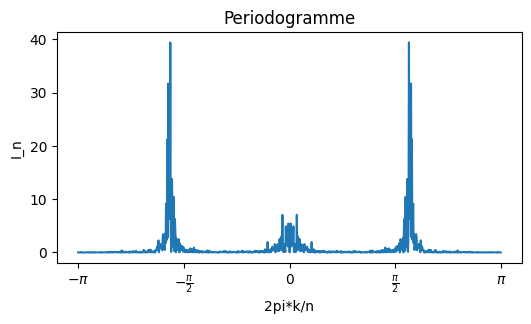

In [34]:
plt.figure(figsize=(6, 3))
plt.title(f'Periodogramme')
I = periodogram(X)
x_axis = 2*np.pi* np.arange(-n//2, n//2).astype(float) /n
plt.plot(x_axis, I)
plt.xlabel('2pi*k/n')
plt.ylabel('I_n')
plt.xticks(np.pi * np.array([-1, -1/2, 0, 1/2, 1]),
           labels=[r'$-\pi$', r'$-\frac{\pi}{2}$', 
                    r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
plt.show()

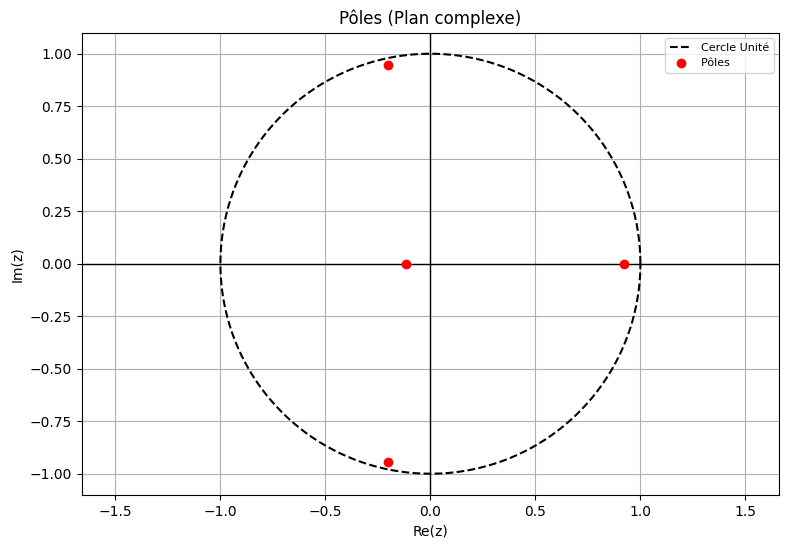

In [35]:
PHI = np.concatenate([[1], -phi])
poles = np.roots(PHI)

theta = np.linspace(0, 2 * np.pi, 500)
circle = np.exp(1j * theta)  

plt.figure(figsize=(9, 6))
plt.plot(circle.real, circle.imag, linestyle='--', label="Cercle Unité", color='black')  
plt.scatter(poles.real, poles.imag, color="red", label="Pôles ", zorder=5)  
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.title("Pôles (Plan complexe)")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.legend(loc="upper right", fontsize=8)
plt.axis('equal') 
plt.grid()
plt.show()

Les pôles correspondent aux valeurs fortes de la densité spectrale comme attendu.

---

# 3. Speech modeling

We will now implement the synthesis algorithm and evaluate it on a speech signal. 

A code template is provided below. We will use the file audio.wav to test the algorithm. 


LIsten to the original and synthesized signal by using any audio player. Try to modify the pitch of the synthesised signal and listen to the result.

In [36]:
## imports

import librosa
import soundfile as sf
import scipy
import numpy as np
import math
from collections import defaultdict
from tqdm import tqdm
import matplotlib.animation
import matplotlib.pyplot as plt
from IPython.display import HTML

In [37]:
## hyperparameters

sampling_rate = 8000 # (Hz)
frame_duration = 0.04 # duration of the analysis frames (seconds)
overlap_ratio = 0.5 # overlap ratio between two consecutive analysis frames
p = 12 # AR(p) model order
f_min = 80 # minimum frequency for pitch detection (Hz)
f_max = 400 # maximum frequency for pitch detection Hz)
pitch_detection_threshold = 0.5 # threshold for pitch detection

In [1]:
## synthesis

# load audio
x = librosa.load('audio.wav', sr=sampling_rate)[0]

# pre-emphasis filtering
x = scipy.signal.lfilter([1, -0.98], [1], x)

# handy variables
n_frame = math.floor(len(x) / (sampling_rate * frame_duration * (1 - overlap_ratio))) - 1 # discard last frame
frame_length = int(sampling_rate * frame_duration)
min_period = math.floor(sampling_rate / f_max)
max_period = math.ceil(sampling_rate / f_min)
synthesis = np.zeros(len(x))
log_dict = defaultdict(list)

# loop over frames
for frame_index in tqdm(range(n_frame)):

    # extract frame
    start = int(frame_index * sampling_rate * frame_duration * (1 - overlap_ratio))
    end = start + frame_length
    frame = x[start:end]

    # detect pitch
    auto_covariance = np.fft.irfft(np.abs(np.fft.rfft(frame - np.mean(frame), (2*frame_length-1)))**2 / frame_length)[:frame_length]
    pitch, max_value = auto_covariance[min_period:].argmax() + min_period, auto_covariance[min_period:].max() / auto_covariance[0]
    if (pitch > max_period) or (max_value * frame_length / (frame_length - pitch) < pitch_detection_threshold): # detect silent frame 
        pitch = 0
    
    # estimate AR(p) coefficients
    gamma = scipy.linalg.toeplitz(auto_covariance[:p+1])
    v = np.array([1 if k==0 else 0 for k in range(p+1)])
    coefficient = np.linalg.solve(gamma, v)
    sigma = 1/coefficient[0]
    coefficient = -sigma*coefficient

    # re-synthetise frame
    if pitch == 0:
        noise = WN(frame_length + p)
        frame_r = scipy.signal.lfilter([1], coefficient, noise)
    else:
        dirac_comb = np.zeros(frame_length + p)
        dirac_comb[::pitch] = np.sqrt(sigma)
        frame_r = scipy.signal.lfilter([1], coefficient, dirac_comb)
    frame_r = frame_r[p:]
    normalization_factor = np.sqrt(sigma / np.var(frame_r))
    frame_r = normalization_factor * frame_r[:frame_length]

    # overlap-add
    synthesis[start:end] += frame_r * np.hanning(frame_length)

    # compute power spectral density (for logging purposes)
    original_psd =  np.abs(np.fft.rfft(frame * np.hanning(frame_length)))**2 
    synthesis_psd = np.abs(np.fft.rfft(frame_r * np.hanning(frame_length)))**2

    # log
    log_dict["frame"].append(frame)
    log_dict["pitch"].append(pitch)
    log_dict["sigma"].append(sigma)
    log_dict["coefficient"].append(coefficient)
    log_dict["frame_r"].append(frame_r)
    log_dict["original_psd"].append(original_psd)
    log_dict["synthesis_psd"].append(synthesis_psd)

# de-emphasis filtering
synthesis = scipy.signal.lfilter([1], [1, -0.98], synthesis)

# log
sf.write('synthesis.wav', synthesis, sampling_rate)
log_dict["synthesis"].append(synthesis)
log_dict = {k: np.array(v) for k, v in log_dict.items()}

NameError: name 'librosa' is not defined

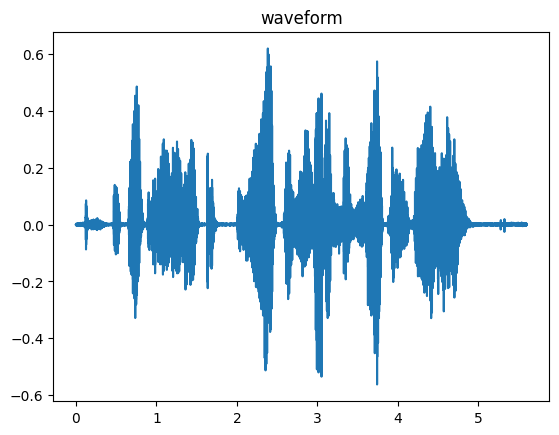

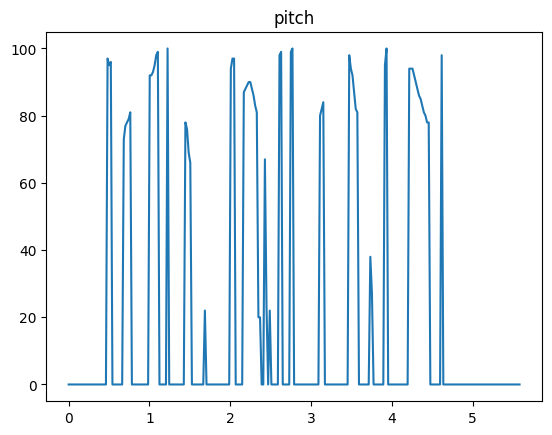

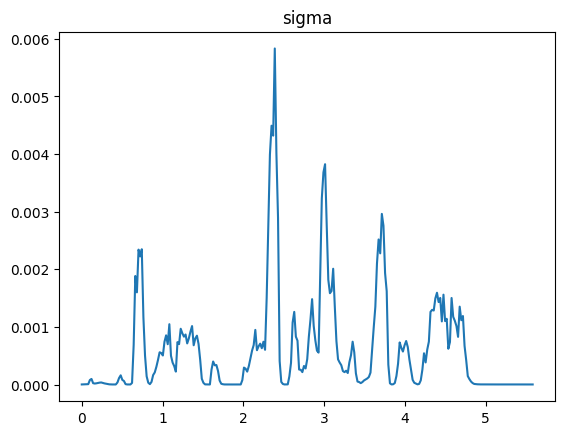

In [39]:
## plot

# time axis for plotting
sample_time = np.linspace(0, len(x)/sampling_rate, len(x))
frame_time = np.linspace(0, n_frame*frame_duration*(1-overlap_ratio), n_frame)

# waveform
plt.title("waveform")
plt.plot(sample_time, x)
plt.show()

# pitch
plt.title("pitch")
plt.plot(frame_time, log_dict["pitch"])
plt.show()

# variance
plt.title("sigma")
plt.plot(frame_time, log_dict["sigma"])
plt.show()

# power spectral density
fig, ax = plt.subplots()
fig.suptitle("estimated & theoretical spectral density")
y_min = min(log_dict["original_psd"].min(), log_dict["synthesis_psd"].min())
y_max = max(log_dict["original_psd"].max(), log_dict["synthesis_psd"].max())
def animate(i):
    ax.cla()
    ax.set_ylim([y_min-0.1, y_max+0.1])
    ax.plot(log_dict["original_psd"][i], label="original_psd")
    ax.plot(log_dict["synthesis_psd"][i], label="synthesis_psd")
animation = matplotlib.animation.FuncAnimation(fig, animate, frames=len(log_dict["original_psd"]))
display(HTML(animation.to_jshtml()))
plt.close()